In [3]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import figure
# import metpy.calc as mpcalc
import matplotlib.ticker as ticker
import xarray as xr
import os
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
# from mpl_toolkits.basemap import Basemap
import pandas as pd
from dask.diagnostics import ProgressBar
import matplotlib.cm as cm
from scipy.stats import pearsonr
from scipy.stats import t
%xmode Plain

Exception reporting mode: Plain


In [3]:
a = (12*360)*(12*180)
print(format(a,".1e"))

9.3e+06


In [2]:
# ds_div = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/DYAMOND_Summer/divergence_ERA5_0p5deg_3h_DS.nc')
# div_ERA5_TM = ds_div['divergence'].mean(dim=['valid_time'])
ds_Dlu = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/ERA5_0p5deg_3h/DRdir2dt_Nlmax5_ERA5_DYAMOND_Summer_tmean.nc')
Dlu = ds_Dlu['LoSSET_DR'].sel(n_scales=3)
ds_w_ERA5 = xr.open_dataset('/gws/nopw/j04/kscale/USERS/dship/ERA5/3hourly/era5_vertical_velocity_201608_3h_0p5deg.nc')
w_ERA5_TM = ds_w_ERA5['w'].sel(lat=slice(-15,15)).mean(dim=['valid_time'])

In [3]:
ds_GAL = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/channel_n2560_GAL9/DRdir2dt_Nlmax5_channel_n2560_GAL9_DS_tmean.nc')
Dlu_GAL = ds_GAL['LoSSET_DR'].sel(n_scales=3)
ds_divGAL_DS = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/DYAMOND_Summer/div_DS_3D_CTC5GAL.nc')
divGAL_DS_TM = ds_divGAL_DS['__xarray_dataarray_variable__'].mean(dim=['time'])
ds_wGAL_DS = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/DYAMOND_Summer/w_DS_3D_CTC5GAL.nc')
wGAL_DS_TM = ds_wGAL_DS['upward_air_velocity'].mean(dim=['time'])

/opt/jaspy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [4]:
ds_RAL = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/LoSSETT_out/channel_n2560_RAL3p2/DRdir2dt_Nlmax5_channel_n2560_RAL3p2_DS_tmean.nc')
Dlu_RAL = ds_RAL['LoSSET_DR'].sel(n_scales=3)
ds_divRAL_DS = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/DYAMOND_Summer/div_DS_3D_CTC5RAL.nc')
divRAL_DS_TM = ds_divRAL_DS['__xarray_dataarray_variable__'].mean(dim=['time'])
ds_wRAL_DS = xr.open_dataset('/gws/nopw/j04/kscale/USERS/emg/data/DYAMOND_Summer/w_DS_3D_CTC5RAL.nc')
wRAL_DS_TM = ds_wRAL_DS['upward_air_velocity'].mean(dim=['time'])

/opt/jaspy/lib/python3.11/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [67]:
levels = Dlu_RAL['level']
correlations = []
var = 'w'
model = 'RAL'

for level in levels:
    data1_level = Dlu_RAL.sel(level=level, latitude=slice(-15,15))
    data2_level = wRAL_DS_TM.sel(pressure=level, latitude=slice(-15,15))
    
    data2_interp = data2_level.interp(latitude=data1_level.latitude, longitude=data1_level.longitude)
    corr = xr.corr(data1_level, data2_interp, dim=["latitude","longitude"])
    correlations.append(corr.values)

corr_array_wRAL = np.array(correlations)
corr_xarray = xr.DataArray(
    corr_array_wRAL, 
    dims=['level'],
    coords={'level': levels},
    name='corrs'
)
corr_xarray.to_netcdf(f'corr_v_p_{var}{model}_DS_15NS.nc')

In [5]:
# div ERA5
ds_corr_divERA5_DS = xr.open_dataset('corr_v_p_divERA5_DS_15NS.nc')
corrs_divERA5_DS = ds_corr_divERA5_DS['corrs']
levelsEd = ds_corr_divERA5_DS['level']
# w ERA5
ds_corr_wERA5_DS = xr.open_dataset('corr_v_p_wERA5_DS_15NS.nc')
corrs_wERA5_DS = ds_corr_wERA5_DS['corrs']
levelsEw = ds_corr_wERA5_DS['level']
# div GAL
ds_corr_divGAL_DS = xr.open_dataset('corr_v_p_divGAL_DS_15NS.nc')
corrs_divGAL_DS = ds_corr_divGAL_DS['corrs']
levelsGd = ds_corr_divGAL_DS['level']
# w GAL
ds_corr_wGAL_DS = xr.open_dataset('corr_v_p_wGAL_DS_15NS.nc')
corrs_wGAL_DS = ds_corr_wGAL_DS['corrs']
levelsGw = ds_corr_wGAL_DS['level']
# div RAL
ds_corr_divRAL_DS = xr.open_dataset('corr_v_p_divRAL_DS_15NS.nc')
corrs_divRAL_DS = ds_corr_divRAL_DS['corrs']
levelsRd = ds_corr_divRAL_DS['level']
# w RAL
ds_corr_wRAL_DS = xr.open_dataset('corr_v_p_wRAL_DS_15NS.nc')
corrs_wRAL_DS = ds_corr_wRAL_DS['corrs']
levelsRw = ds_corr_wRAL_DS['level']

In [13]:
wETMM = w_ERA5_TM.mean(dim=['lat','lon'])

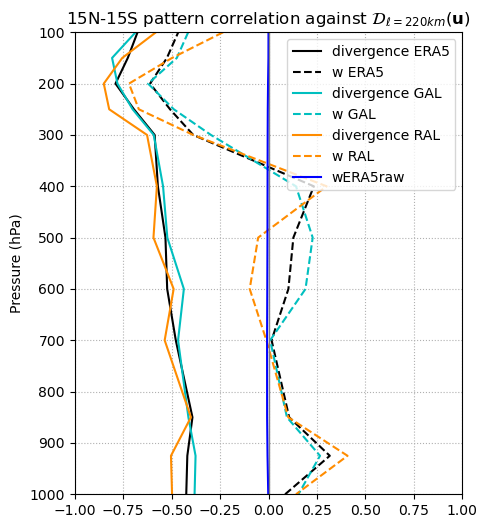

In [14]:
fig,ax = plt.subplots(1,1,figsize=(5,6))

ax.plot(-corrs_divERA5_DS,levelsEd,'k',label='divergence ERA5')
ax.plot(corrs_wERA5_DS,levelsEw,'k--',label='w ERA5')
ax.plot(-corrs_divGAL_DS,levelsGd,'c',label='divergence GAL')
ax.plot(-corrs_wGAL_DS,levelsGw,'c--',label='w GAL')
ax.plot(-corrs_divRAL_DS,levelsRd,'darkorange',label='divergence RAL')
ax.plot(-corrs_wRAL_DS,levelsRw,'darkorange',linestyle='--',label='w RAL')
ax.plot(wETMM,levelsEw,'b',label='wERA5raw')
ax.invert_yaxis()
ax.grid(True,linestyle=':')
ax.set_xlim([-1,1])
ax.set_ylim([1000,100])
ax.legend()
ax.set_ylabel('Pressure (hPa)')
ax.set_title(r'15N-15S pattern correlation against $\mathcal{D}_{\ell=220km}(\mathbf{u})$')
ax.axvline(0,color='gray',linewidth=1)
# fig.savefig('/home/users/emg97/emgPlots/LO_corr_v_p_DS_w_div_Dlu_l220km.png',dpi=300,bbox_inches='tight')